# CUDA exercises

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

from IPython.display import display

In [3]:
HEADER = ["tests_done", "N", "total_time", "average_time", "max_runtime", "min_runtime"]
HEADER2 = ["grid_sizes", "block_size"] + HEADER
def csv_parse(path, header=False):
    if header:
        df = pd.read_csv(path, sep=";", names=header)
    else:
        df = pd.read_csv(path, sep=";")
    #display(df.head())
    return df



# Ex3.1 Sums

In [28]:
def calcGB_Stride(df):
    return 3*8* df["N"]/df["k"] /1e9

def calcGB_Offset(df):
    return 3*8* (df["N"]-df["k"])/1e9


In [37]:
df1 = csv_parse("data_offset.csv", header=False)
df2 = csv_parse("data_stride.csv", header=False)
df1["GB"] = calcGB_Offset(df1)
df1["bandwidth"] = df1["GB"]/df1["time"]
df2["GB"] = calcGB_Stride(df2)
df2["bandwidth"] = df2["GB"]/df2["time"]

display(df1)
display(df2)

,k,time,N,Grid Size,Block Size,GB,bandwidth
0,0,0.019741,100000000,256,256,2.400000,121.574388
1,1,0.012727,100000000,256,256,2.400000,188.575468
2,2,0.012739,100000000,256,256,2.400000,188.397830
3,3,0.012799,100000000,256,256,2.400000,187.514644
4,4,0.013327,100000000,256,256,2.400000,180.085533
...,...,...,...,...,...,...,...
60,60,0.013344,100000000,256,256,2.399999,179.856007
61,61,0.012989,100000000,256,256,2.399999,184.771617
62,62,0.013010,100000000,256,256,2.399999,184.473368
63,63,0.012942,100000000,256,256,2.399998,185.442628


,k,time,N,Grid Size,Block Size,GB,bandwidth
0,1,0.012098,100000000,256,256,2.400000,198.379898
1,2,0.016318,100000000,256,256,1.200000,73.538424
2,3,0.016850,100000000,256,256,0.800000,47.477745
3,4,0.016266,100000000,256,256,0.600000,36.886758
4,5,0.014616,100000000,256,256,0.480000,32.840722
...,...,...,...,...,...,...,...
59,60,0.002994,100000000,256,256,0.040000,13.360053
60,61,0.002897,100000000,256,256,0.039344,13.581036
61,62,0.002828,100000000,256,256,0.038710,13.688005
62,63,0.002735,100000000,256,256,0.038095,13.928789


In [38]:
#logx, logy = True, True
logx, logy = False, False
labels = ["Offset", "Stride"]

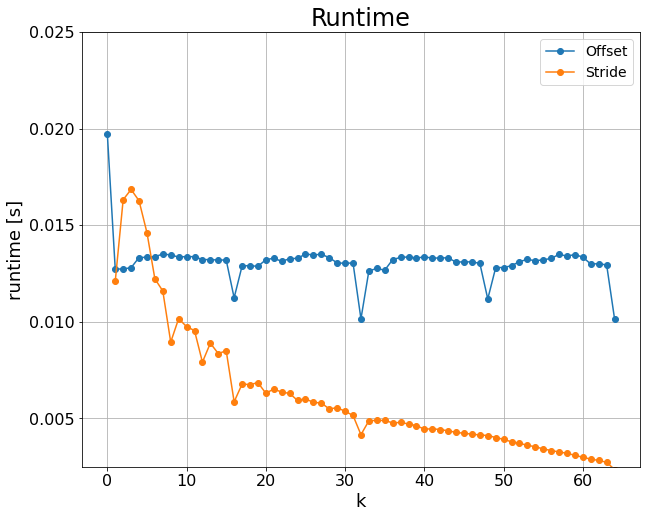

In [39]:
fig,ax  = plt.subplots(figsize=(10,8));

df1.plot(x="k", y="time", ax=ax, logx=logx, logy=logy, marker="o");
df2.plot(x="k", y="time", ax=ax, logx=logx, logy=logy, marker="o", fontsize=16);
ax.set_title("Runtime", fontsize=24);
ax.set_ylabel("runtime [s]", fontsize=18);
ax.set_xlabel("k", fontsize=18);
ax.set_ylim(0.0025, 0.025)
ax.legend(labels, fontsize=14);
ax.grid();
fig.savefig("runtime.pdf")

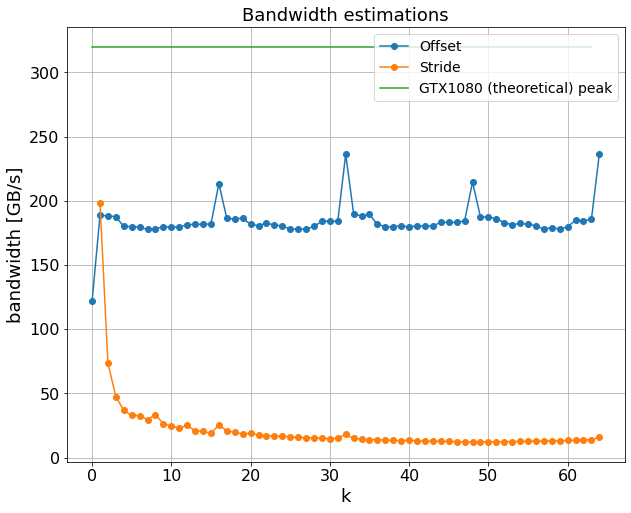

In [40]:
fig,ax  = plt.subplots(figsize=(10,8));
df1.plot(x="k", y="bandwidth", ax=ax, logx=logx, logy=logy, marker="o");
df2.plot(x="k", y="bandwidth", ax=ax, logx=logx, logy=logy, marker="o", fontsize=16);
plt.plot([i for i in range(64)], [320]*64)
ax.set_title("Bandwidth estimations", fontsize=18);
ax.set_ylabel("bandwidth [GB/s]", fontsize=18);
ax.set_xlabel("k", fontsize=18);
rcParams["legend.loc"] = 'upper right'
ax.legend(labels+["GTX1080 (theoretical) peak"], fontsize=14);
ax.grid();
fig.savefig("bandwidth.pdf")